In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['figure.figsize'] = (12.8, 9.6)

threshold_over_50 = 10

poss_name = 'possession_until_halftime'
Y_column = 'shots_on_second_half'

# Main Analysis

In [9]:
ress = []
for i in [1, 5, 10, 15]:
    res_df = pd.read_csv(f'results/res_{i}.csv', index_col=0)
    res_df['threshold'] = i+50
    ress.append(res_df)

all_res_df = pd.concat(ress)

# print(len(all_res_df))

all_res_df = all_res_df.melt(id_vars=['threshold'], value_vars=['IPW', 'S_learner', 'T_learner', 'Matching_propensity', 'Matching_all',], 
                             var_name='algorithm', value_name='ATE')


2000


<AxesSubplot:xlabel='algorithm', ylabel='ATE'>

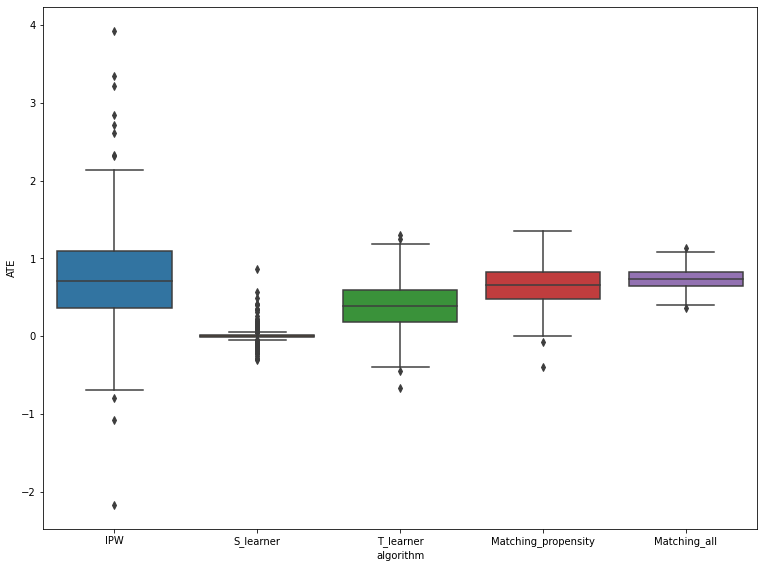

In [10]:
sns.boxplot(data=all_res_df[(all_res_df['ATE'].between(-4, 10)) & 
                            (all_res_df['threshold'] == 60)], x='algorithm', y='ATE')

# Possetion threshold Analysis

<AxesSubplot:xlabel='threshold', ylabel='ATE'>

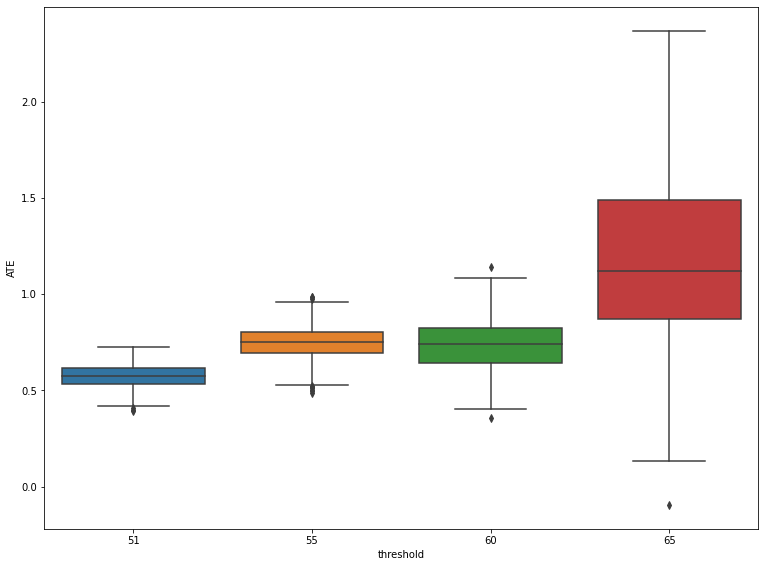

In [3]:
sns.boxplot(data=all_res_df[(all_res_df['ATE'].between(-4, 10)) & 
                            (all_res_df['algorithm'] == 'Matching_all') & 
                            (all_res_df['threshold'] <= 65)], x='threshold', y='ATE')


# Team Rating Analysis

In [4]:
# res_df = pd.DataFrame(res)
ress = []
for i in [(0, 3), (3, 7), (7, 15)]:
    name = "_".join([str(x) for x in i]) 
    res_df = pd.read_csv(f'results/res_{name}.csv', index_col=0)
    res_df['diff'] = name
    ress.append(res_df)

all_res_df = pd.concat(ress)

# all_res_df.boxplot()

print(len(all_res_df))

all_res_df = all_res_df.melt(id_vars=['diff'], value_vars=['IPW', 'S_learner', 'T_learner', 'Matching_propensity', 'Matching_all',], 
                             var_name='algorithm', value_name='ATE')


1200


<AxesSubplot:xlabel='diff', ylabel='ATE'>

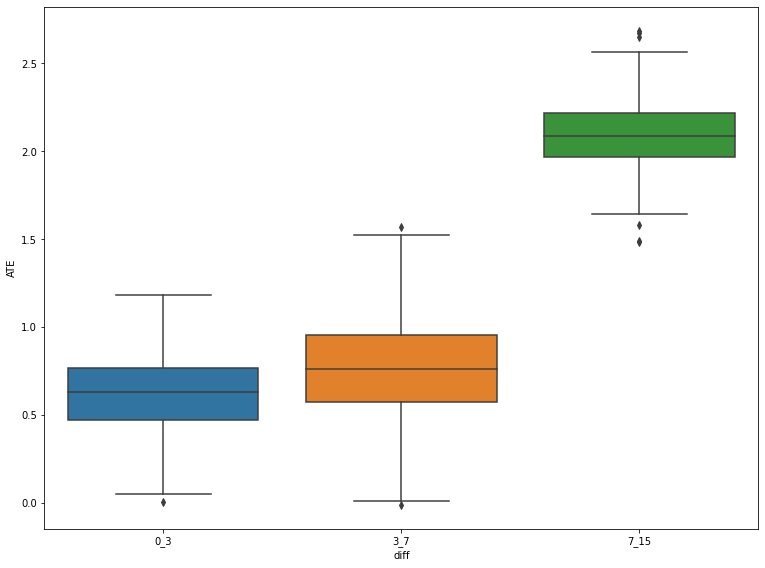

In [5]:
sns.boxplot(data=all_res_df[(all_res_df['ATE'].between(-4, 100)) & 
                            (all_res_df['algorithm'] == 'Matching_all')], x='diff', y='ATE')


# Home or Away Analysis

In [13]:
ress = []
for i in ['domminated_home_dominating_away', 'domminating_home_dominated_away']:
    name = i
    res_df = pd.read_csv(f'results/res__{name}.csv', index_col=0)
    res_df['diff'] = name
    ress.append(res_df)

all_res_df = pd.concat(ress)

# all_res_df.boxplot()

print(len(all_res_df))

# 'IPW', 'S_learner', 'T_learner', 'Matching_propensity', 
all_res_df = all_res_df.melt(id_vars=['diff'], value_vars=['Matching_all',], 
                             var_name='algorithm', value_name='ATE')


900


Text(0.5, 0, '')

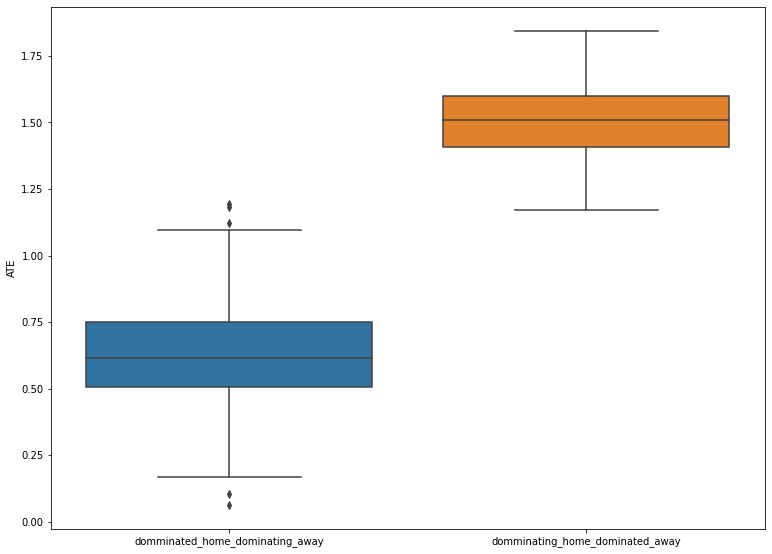

In [14]:
sns.boxplot(data=all_res_df[(all_res_df['ATE'].between(-4, 10)) & 
                            (all_res_df['algorithm'] == 'Matching_all')], x='diff', y='ATE')
plt.xlabel('')

In [20]:
all_res_df[(all_res_df['ATE'].between(-4, 10)) & 
                            (all_res_df['algorithm'] == 'Matching_all')].groupby('diff').std()

,ATE
diff,
domminated_home_dominating_away,0.182279
domminating_home_dominated_away,0.134058
